In [2]:
from sklearn import datasets, tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [8]:
mnist = datasets.load_digits()
features, labels = mnist.data, mnist.target
features, labels, features.shape

(array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 array([0, 1, 2, ..., 8, 9, 8]),
 (1797, 64))

In [9]:
def cross_validation(classifier, features, labels):
    cv_scores = []
    
    for i in range(10):
        scores = cross_val_score(classifier, features, labels, cv = 10, scoring='accuracy')
        cv_scores.append(scores.mean())
        
    return cv_scores

In [10]:
df_cv_scores = cross_validation(tree.DecisionTreeClassifier(), features, labels)

In [11]:
rf_cv_scores = cross_validation(RandomForestClassifier(), features, labels)

In [15]:
df_cv_scores, rf_cv_scores

([0.8280291744258225,
  0.8330415890751086,
  0.8313811297330851,
  0.8307914338919925,
  0.8196865301055245,
  0.8196617008069522,
  0.8235723153320919,
  0.8257945375543141,
  0.8296958410924891,
  0.8224643078833023],
 [0.9504655493482309,
  0.9510180012414648,
  0.9460086902545003,
  0.9526908752327745,
  0.9471229050279328,
  0.9504655493482307,
  0.951024208566108,
  0.9426784605834884,
  0.9499130974549969,
  0.9432278088144009])

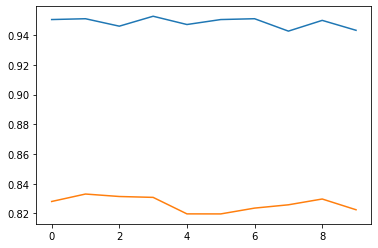

In [18]:
plt.plot(rf_cv_scores)
plt.plot(df_cv_scores)
plt.show()
# 파란색이 랜덤포레스트, 주황색이 디시젼 트리 이다.

In [20]:
np.mean(df_cv_scores), np.mean(rf_cv_scores)

(0.8264118559900684, 0.9484615145872128)

In [13]:
# cv_list = [
#     ['random_forest', rf_cv_scores],
#     ['decision_tree', df_cv_scores]
# ]
# # df = pd.DataFrame.from_items(cv_list)
# df = pd.DataFrame.from_dict(cv_list)

In [19]:
# df.plot()